# Jazli Muhammad Khairi Leong
# Student Number: 1007793595
# UTORid: muham283

I will choose Red = 0.8, Blue = 0.5 and Other = 0.2. I will choose Other to be Black on the plot.

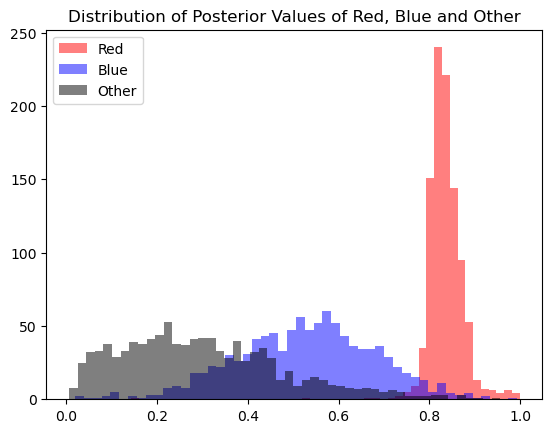

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def update_posterior(alpha, beta, x):
    alpha_post = alpha + x
    beta_post = beta + 1 - x
    return alpha_post, beta_post

red_posterior_samples = []
blue_posterior_samples = []
other_posterior_samples = [] 

theta_red = 0.8
theta_blue = 0.5
theta_other = 0.2

num_samples = 1000

red_post_alpha, red_post_beta = 1, 1
blue_post_alpha, blue_post_beta = 1, 1
other_post_alpha, other_post_beta = 1, 1

for _ in range(num_samples):
    random_red_sample = stats.beta.rvs(red_post_alpha, red_post_beta)
    random_blue_sample = stats.beta.rvs(blue_post_alpha, blue_post_beta)
    random_other_sample = stats.beta.rvs(other_post_alpha, other_post_beta)
    
    max_result = np.argmax([random_red_sample, random_blue_sample, random_other_sample])
    
    if max_result == 0:
        result = stats.binom(n=1, p = theta_red).rvs(size=1)
        red_post_alpha, red_post_beta = update_posterior(red_post_alpha, red_post_beta, result)
        
    elif max_result == 1:
        result = stats.binom(n=1, p= theta_blue).rvs(size=1)
        blue_post_alpha, blue_post_beta = update_posterior(blue_post_alpha, blue_post_beta, result)
        
    else:
        result = stats.binom(n=1, p= theta_other).rvs(size=1)
        other_post_alpha, other_post_beta = update_posterior(other_post_alpha, other_post_beta, result)
    
    red_posterior_samples.append(random_red_sample)
    blue_posterior_samples.append(random_blue_sample)
    other_posterior_samples.append(random_other_sample)

plt.hist(red_posterior_samples, bins=50, alpha=0.5, label='Red', color='red')
plt.hist(blue_posterior_samples, bins=50, alpha=0.5, label='Blue', color='blue')
plt.hist(other_posterior_samples, bins=50, alpha=0.5, label='Other', color='black')
plt.legend()
plt.title("Distribution of Posterior Values of Red, Blue and Other")
plt.show()

We can see that the distribution of the posterior values of the Red have the highest vlaue, Blue with the second highest and Other with the lowest. Red, Blue and Other were beta distribution that were intialized with parameters $\alpha$ and $\beta$ to be 1, 1 that transformed into those above.

### What's the data?
The data here is the success or failure of the simulated synthetic data generated from a binomial distirbution (success or failure) off of probabilities of success. Each of these choices have different probabilities of success being 0.8, 0.5 and 0.2 respectively.

### What's the update for the posterior in question?
Since this is a binomial distribution the update rule is defined to be:

$$ \alpha_{k+1} = \alpha_k + x$$
$$ \beta_{k+1} = \beta{k} - x + 1$$

As k is an iteration and x signifies success or failure ($x \in {0, 1}$)

### Which one of the three choices will you try out? How will you choose? 
Using the max function, I utilized Thompson sampling to choose the sample with the greatest value while still allowing randomized sampling to occur. The exploitation occurs through the max function which takes the best sample from the posterior distributions. This exploits the fact that since Red has inherently has a higher probability of success that this should be the max value of the three values sampled from the posterior most of the time. Though this will also explore at times when the distribution of the best (Red) theta does not get the highest value compared to the other distributions since they all select random samples. 
